In [14]:
import json
import csv
import glob
from pathlib import Path

inputpath = glob.glob(str(Path.cwd().parent / "data" / "pages_*.csv"))
inputpath = list(filter(lambda p: Path(p).name.startswith("pages_") and Path(p).name.endswith(".csv"), inputpath))
assert len(inputpath) > 0
inputpath.sort()
inputpath = inputpath[-1]
inputfile = list(csv.reader(open(inputpath, "r")))
header = [word for word in inputfile[0]]
body = inputfile[1:]

dicts = list(map(lambda row: dict(zip(header, row)), body))  # convert to dict
dicts = list(map(lambda elem: {k: (v if v != "" else None) for k, v in elem.items()}, dicts))  # get null

# get elem with least fields being null
elem = min(dicts, key=lambda elem: sum([1 for v in elem.values() if v is None]))

# truncate string values to 100 characters
elem = {k: (v[:100] + "..." if type(v) is str and len(v) > 100 else v) for k, v in elem.items()}

# print json
print(json.dumps(elem, indent=4, sort_keys=True, ensure_ascii=False))

{
    "address": "1200 wien, 20. bezirk, brigittenau, jägerstraße",
    "bautyp": "altbau",
    "böden": "parkett",
    "company_address": "messendorferstraße 71a8041 graz",
    "company_broker_name": "magdalena tiatco-frank",
    "company_name": "schantl ith immobilientreuhand gmbh",
    "company_reference_id": "267143",
    "company_url": "http://www.schantl-ith.at",
    "description_additional": "Stockwerk: 3. Etage / 3. LiftstockStiege: 1Kabel/Sat TVEnergiepass gültig bis: 2022-12-11Energiepass...",
    "description_equipment": "Balkonanzahl:1Balkonfläche:8,98 m²Bad mit DuscheBoden: FliesenbodenBoden: ParkettbodenHeizung: Etage...",
    "description_general": "Kaufen Sie heute diese wunderschöne Wohnung in 1200 Wien und Sie werden es nie bereuen! Diese Immobi...",
    "description_location": "Wallensteinplatz, Jägerstraße, Augarten, Donaukanalöffentliche Verkehrsanbindung: U4 und U6 // Straß...",
    "energy_certificate": "d",
    "heizung": "etagenheizung",
    "last_update": "26.

# sketch schema

/var/folders/p6/sy85mkz13lsffnvz7237y4340000gn/T/ipykernel_28257/1751106116.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


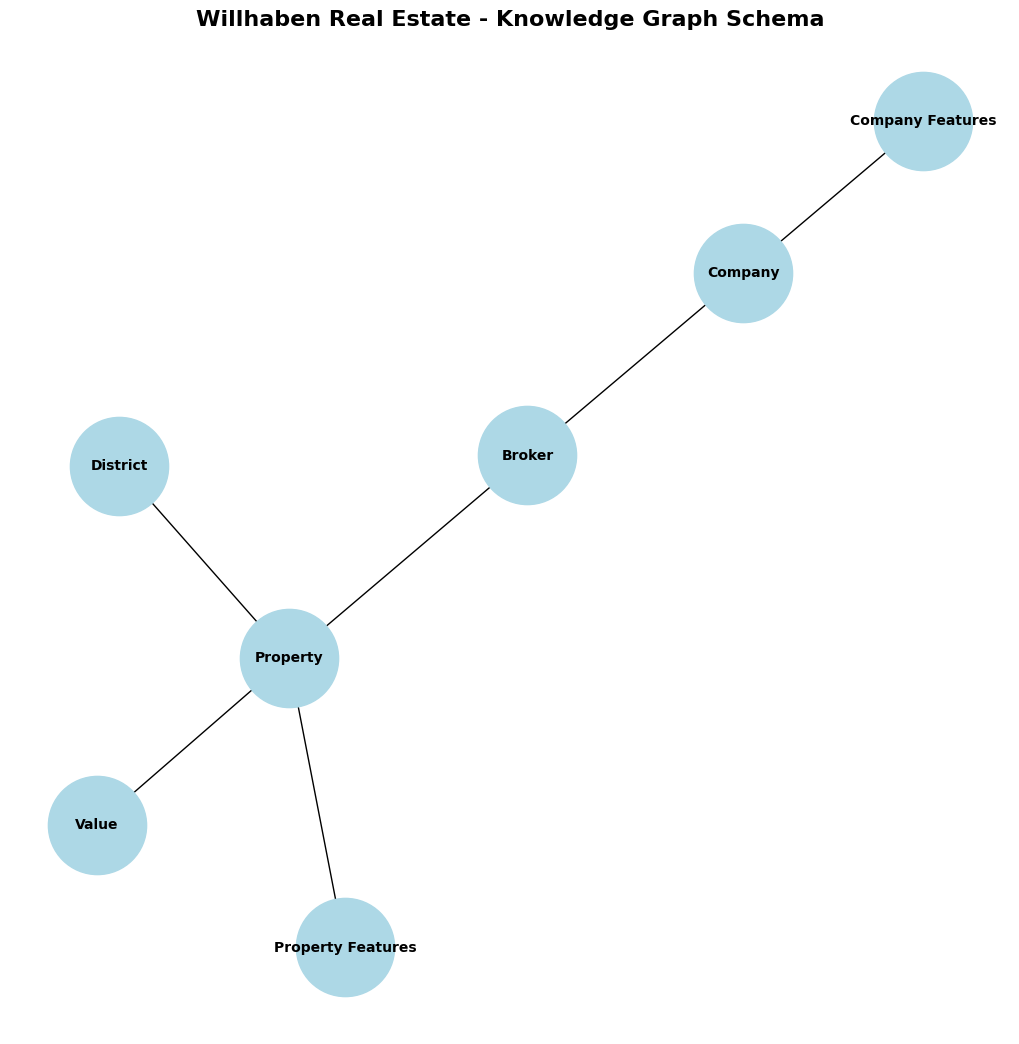

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
plt.figure(figsize=(10, 10))

G.add_node("Property")
G.add_node("Broker")
G.add_node("Company")
G.add_node("District")
G.add_node("Value")

G.add_node("Property Features")
G.add_node("Company Features")

G.add_edge("Property", "Property Features", label="has_feature")
G.add_edge("Property", "District", label="located_in")
G.add_edge("Property", "Value", label="has_value")
G.add_edge("Company", "Company Features", label="has_feature")

G.add_edge("Company", "Broker", label="employed_by")
G.add_edge("Broker", "Property", label="mediated_by")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=5000, font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "label")

plt.title("Willhaben Real Estate - Knowledge Graph Schema", fontsize=16, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

/var/folders/p6/sy85mkz13lsffnvz7237y4340000gn/T/ipykernel_28257/4132748541.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


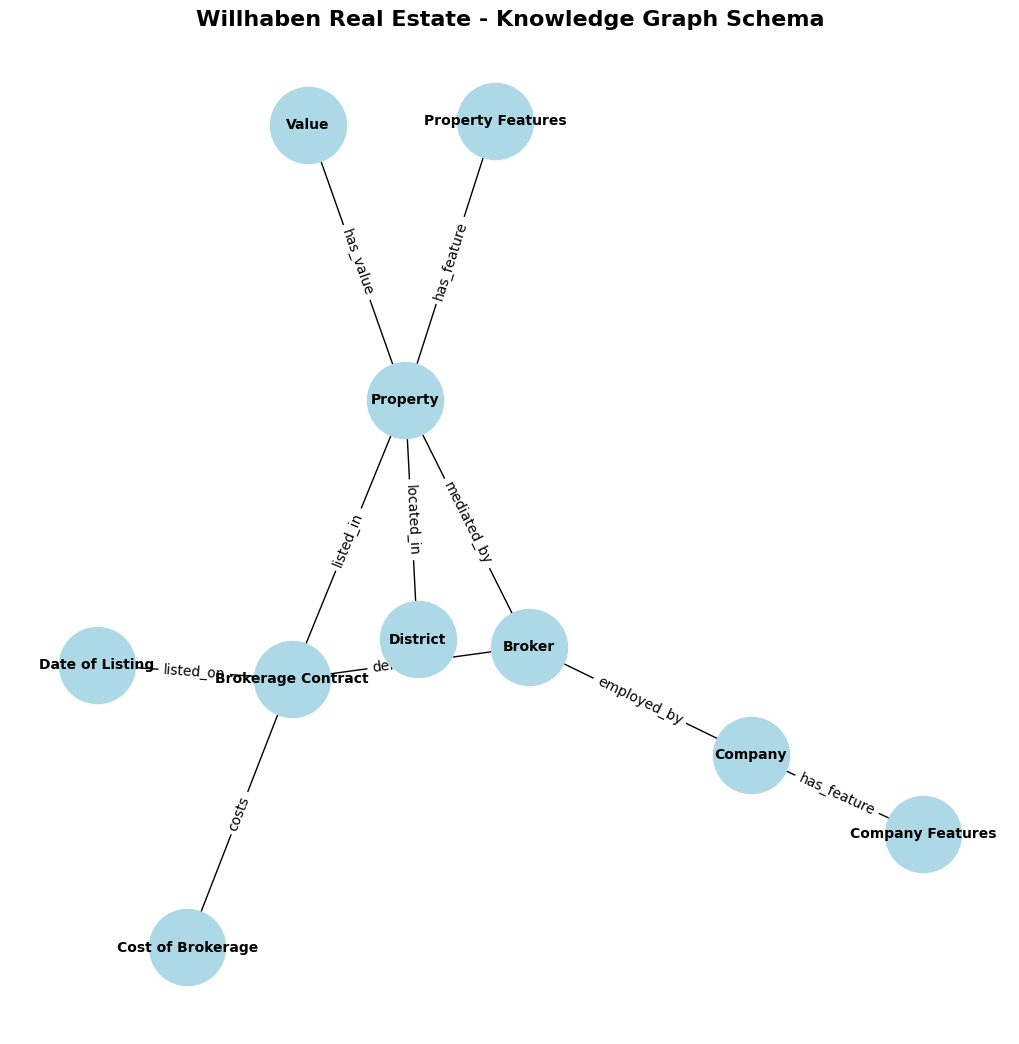

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
plt.figure(figsize=(10, 10))

G.add_node("Property")
G.add_node("Broker")
G.add_node("Brokerage Contract")
G.add_node("Company")
G.add_node("District")
G.add_node("Value")
G.add_node("Date of Listing")
G.add_node("Cost of Brokerage")

G.add_node("Property Features")
G.add_node("Company Features")

G.add_edge("Property", "Property Features", label="has_feature")
G.add_edge("Property", "District", label="located_in")
G.add_edge("Property", "Value", label="has_value")
G.add_edge("Company", "Company Features", label="has_feature")

G.add_edge("Property", "Brokerage Contract", label="listed_in")
G.add_edge("Brokerage Contract", "Broker", label="defined_by")
G.add_edge("Brokerage Contract", "Date of Listing", label="listed_on")
G.add_edge("Brokerage Contract", "Cost of Brokerage", label="costs")

G.add_edge("Company", "Broker", label="employed_by")
G.add_edge("Broker", "Property", label="mediated_by")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

node_labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=node_labels)


plt.title("Willhaben Real Estate - Knowledge Graph Schema", fontsize=16, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()